# Projeto de INF1032

## Análise do Mercado Financeiro durante a pandemia.

### Passos:

● Coletar os dados da empresa Orama Investimentos.

● Fazer uma análise do mercado financeiro durante as crises,
comparando com os dados de 2020 e 2008.

● Identificar se existirá um crescimento das ações para os próximos 3
meses através de um modelo de classificação.

### Alunos: Barbara Herrera, Geam Morales e Nathalia Inácio

## Imports

In [121]:
import pandas as pd
import dataframe_image as dfi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from re import sub
from decimal import Decimal

# Ocultando Warnings indesejados
import warnings
warnings.filterwarnings('ignore')

# Pandemia 2008

## Lendo arquivo cotação 2008

In [2]:
data_url = '2008_Cotação.csv'
data_2008 = pd.read_csv(data_url, header='infer', error_bad_lines=False, sep=';',)
print("Total de Linhas: ",data_2008.shape[0])
data_2008.head()

Total de Linhas:  5573


,Empresa,Mês,Abertura,Segmento
0,ABC BRASIL,1,"573,14",Outro
1,ABC BRASIL,10,"178,9",Outro
2,ABC BRASIL,11,"155,45",Outro
3,ABC BRASIL,12,"157,61",Outro
4,ABC BRASIL,2,"396,6",Outro


## Eliminando linhas vazias


In [3]:
data_2008 = data_2008.dropna()
print("Total de Linhas: ",data_2008.shape[0])
data_2008.head()

Total de Linhas:  5573


,Empresa,Mês,Abertura,Segmento
0,ABC BRASIL,1,"573,14",Outro
1,ABC BRASIL,10,"178,9",Outro
2,ABC BRASIL,11,"155,45",Outro
3,ABC BRASIL,12,"157,61",Outro
4,ABC BRASIL,2,"396,6",Outro


## Fazendo transposição

In [4]:
data_2008 = data_2008.pivot(index=['Segmento', 'Empresa'], columns='Mês', values='Abertura')
dfi.export(data_2008,"tabela_2008.png", max_rows = -1)
data_2008.head()

Mês                                           1         2         3   \
Segmento                  Empresa                                      
Agropecuária              SLC AGRICOLA    805,76    857,33    986,26   
Alimentos Processados     M.DIASBRANCO  1.166,72    784,78    738,87   
                          SAO MARTINHO  1.424,69  1.346,24  1.384,18   
Automóveis e Motocicletas IOCHP-MAXION  1.979,15  1.562,38  1.788,05   
                          PLASCAR PART     690,7    566,09    448,34   

Mês                                           4         5         6   \
Segmento                  Empresa                                      
Agropecuária              SLC AGRICOLA  1.370,22  1.506,47  1.452,53   
Alimentos Processados     M.DIASBRANCO  1.005,23  1.020,48    945,18   
                          SAO MARTINHO  1.373,47   1.654,6  1.340,56   
Automóveis e Motocicletas IOCHP-MAXION  1.563,58  1.902,57  1.917,95   
                          PLASCAR PART    422,13     423,9    467,22   

Mês                                           7         8         9       10  \
Segmento                  Empresa                                              
Agropecuária              SLC AGRICOLA  1.512,72  1.061,17    983,34  553,59   
Alimentos Processados     M.DIASBRANCO   1.066,6    906,34    867,62  627,59   
                          SAO MARTINHO  1.395,77  1.151,49  1.171,11  733,55   
Automóveis e Motocicletas IOCHP-MAXION  1.570,17  1.340,11   1.293,3  813,15   
                          PLASCAR PART    418,13    345,07    249,73  160,93   

Mês                                         11      12  
Segmento                  Empresa                       
Agropecuária              SLC AGRICOLA  440,39  534,04  
Alimentos Processados     M.DIASBRANCO  646,34  569,36  
                          SAO MARTINHO  425,71   454,7  
Automóveis e Motocicletas IOCHP-MAXION  483,66  437,47  
                          PLASCAR PART  114,68   63,39

In [5]:
data_2008.to_csv('2008.csv')

## Visualizando nova tabela transposta

In [6]:
data_url = '2008.csv'
data_2008 = pd.read_csv(data_url, header='infer', error_bad_lines=False, sep=',',)
print("Total de Linhas: ",data_2008.shape[0])
data_2008.head()

Total de Linhas:  683


,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12
0,Agropecuária,SLC AGRICOLA,"805,76","857,33","986,26","1.370,22","1.506,47","1.452,53","1.512,72","1.061,17","983,34","553,59","440,39","534,04"
1,Alimentos Processados,M.DIASBRANCO,"1.166,72","784,78","738,87","1.005,23","1.020,48","945,18","1.066,6","906,34","867,62","627,59","646,34","569,36"
2,Alimentos Processados,SAO MARTINHO,"1.424,69","1.346,24","1.384,18","1.373,47","1.654,6","1.340,56","1.395,77","1.151,49","1.171,11","733,55","425,71","454,7"
3,Automóveis e Motocicletas,IOCHP-MAXION,"1.979,15","1.562,38","1.788,05","1.563,58","1.902,57","1.917,95","1.570,17","1.340,11","1.293,3","813,15","483,66","437,47"
4,Automóveis e Motocicletas,PLASCAR PART,"690,7","566,09","448,34","422,13","423,9","467,22","418,13","345,07","249,73","160,93","114,68","63,39"


## Tratando e convertendo os dados de valores

In [7]:
for month in range(1, 13): 
    data_2008[str(month)] = data_2008[str(month)].str.replace('.','')
    data_2008[str(month)] = data_2008[str(month)].str.replace(',','.')
    data_2008[str(month)] = data_2008[str(month)].astype(float)

data_2008.head()

<ipython-input-7-b3481f940e9c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data_2008[str(month)] = data_2008[str(month)].str.replace('.','')


,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12
0,Agropecuária,SLC AGRICOLA,805.76,857.33,986.26,1370.22,1506.47,1452.53,1512.72,1061.17,983.34,553.59,440.39,534.04
1,Alimentos Processados,M.DIASBRANCO,1166.72,784.78,738.87,1005.23,1020.48,945.18,1066.60,906.34,867.62,627.59,646.34,569.36
2,Alimentos Processados,SAO MARTINHO,1424.69,1346.24,1384.18,1373.47,1654.60,1340.56,1395.77,1151.49,1171.11,733.55,425.71,454.70
3,Automóveis e Motocicletas,IOCHP-MAXION,1979.15,1562.38,1788.05,1563.58,1902.57,1917.95,1570.17,1340.11,1293.30,813.15,483.66,437.47
4,Automóveis e Motocicletas,PLASCAR PART,690.70,566.09,448.34,422.13,423.90,467.22,418.13,345.07,249.73,160.93,114.68,63.39


## Maiores valores de abertura das empresas em 2008

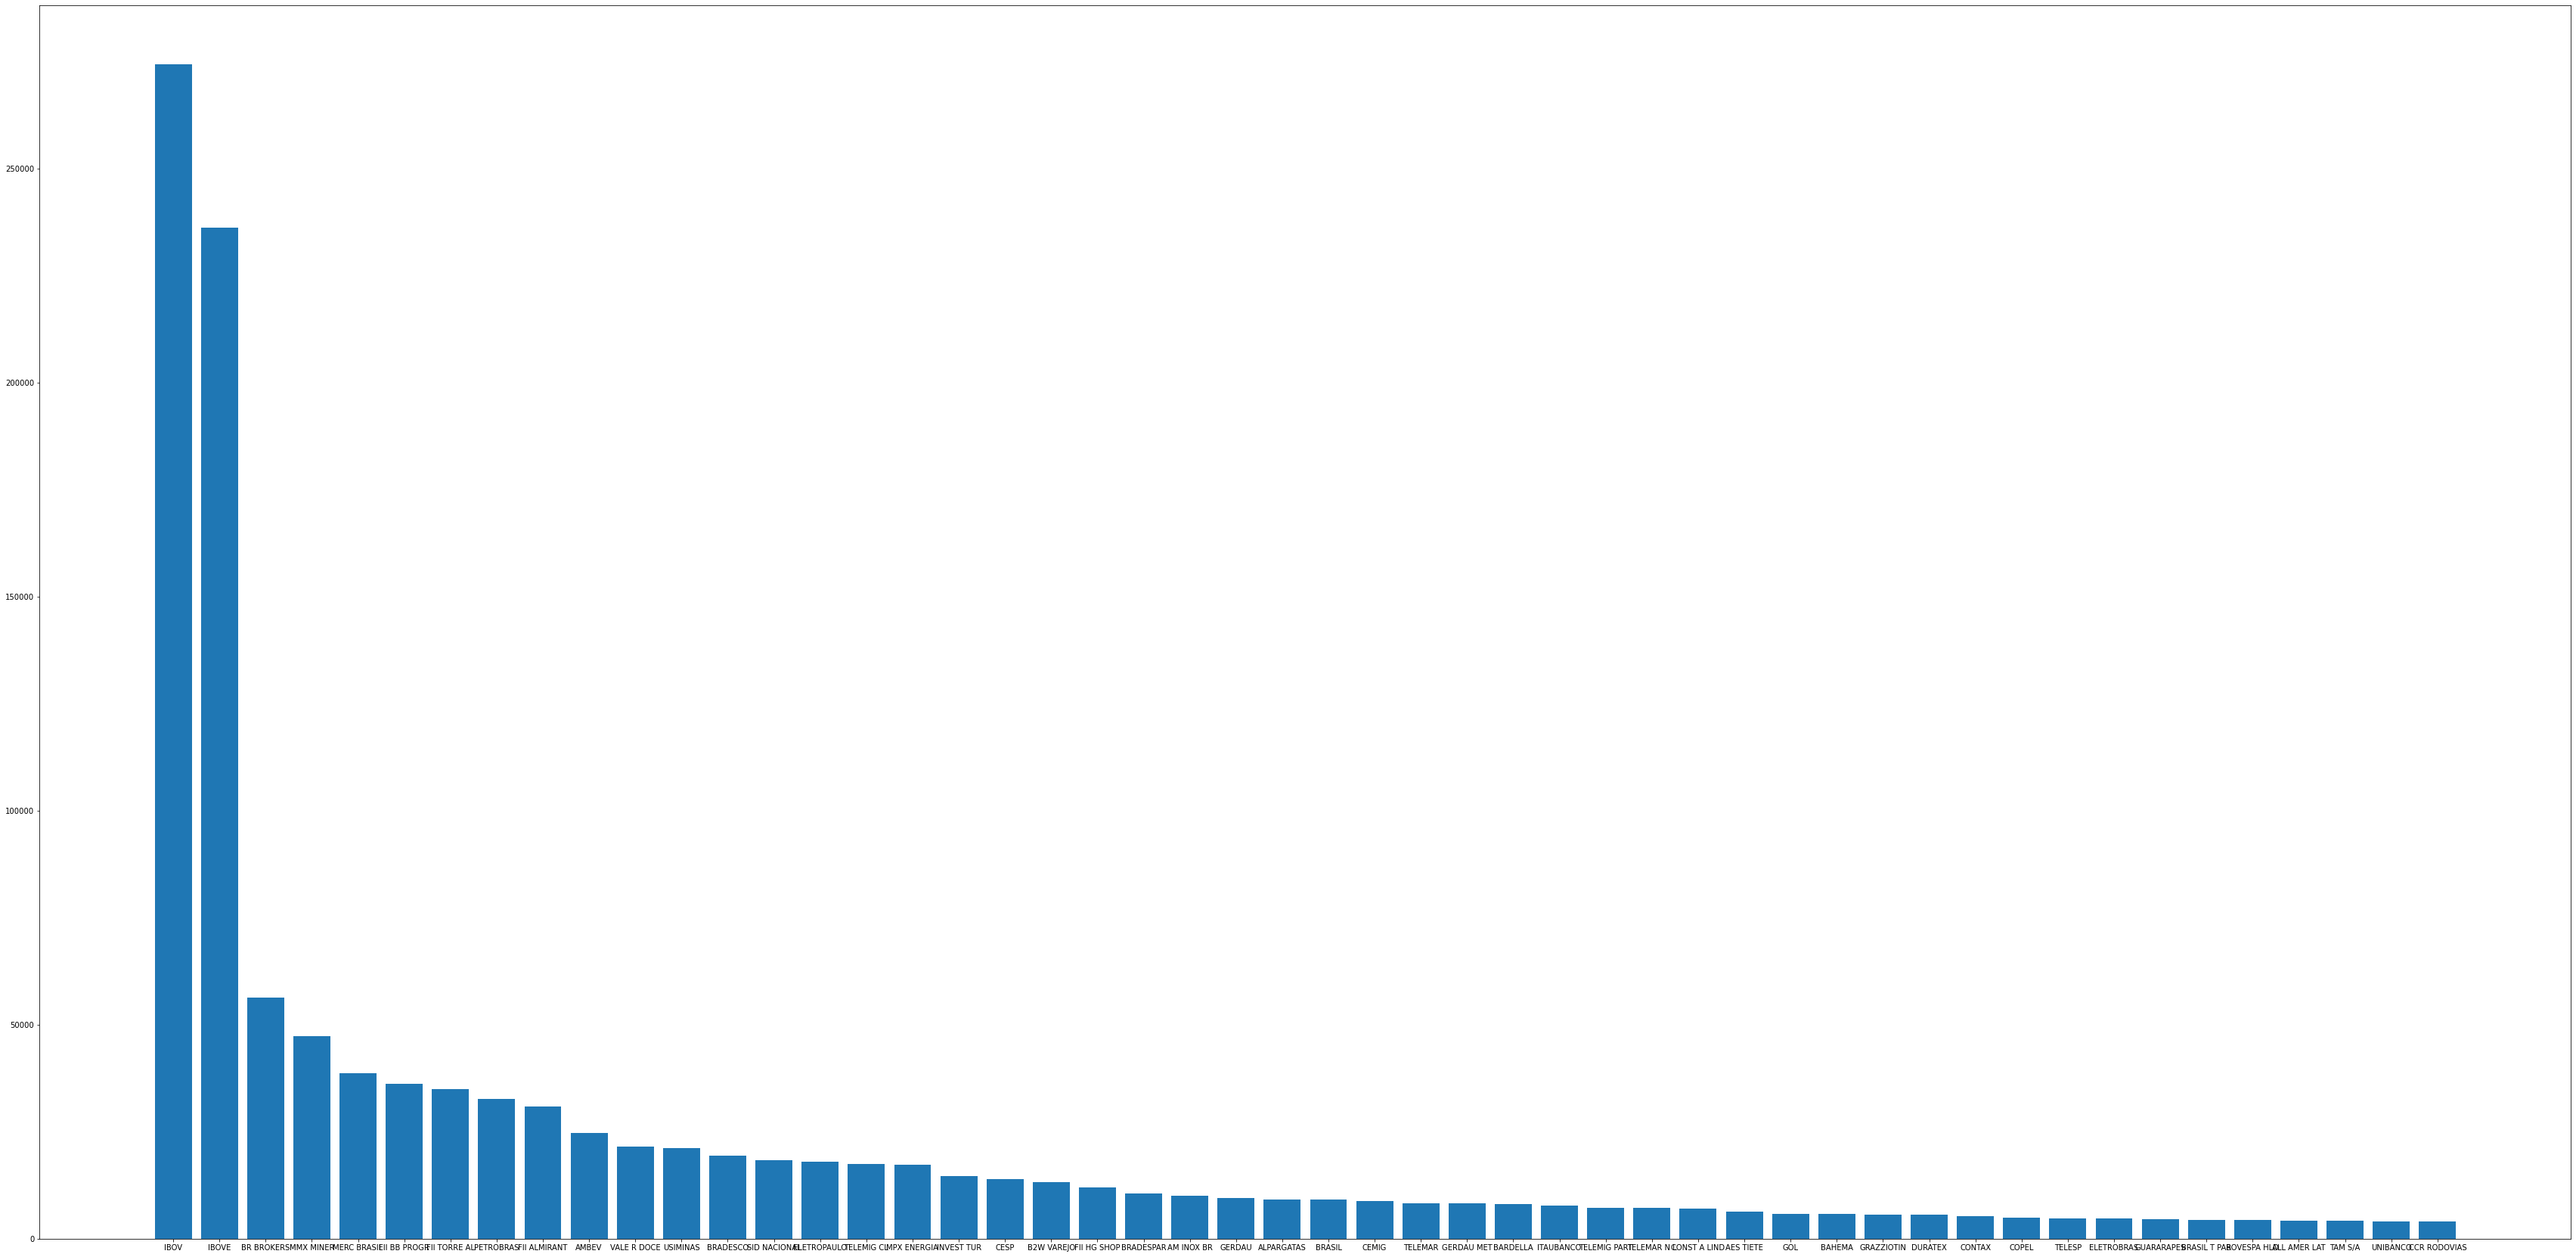

<Figure size 432x288 with 0 Axes>

In [8]:
data_2008_largest_abertura = data_2008.nlargest(50, '1')

empresa = data_2008_largest_abertura['Empresa']
janeiro = data_2008_largest_abertura['1']

fig = plt.figure(figsize =(60, 30))
plt.bar(empresa, janeiro)
plt.show()
plt.savefig('maiores_valores_abertura_empresas_2008.png', dpi=300)

## Menores valores de abertura das empresas em 2008

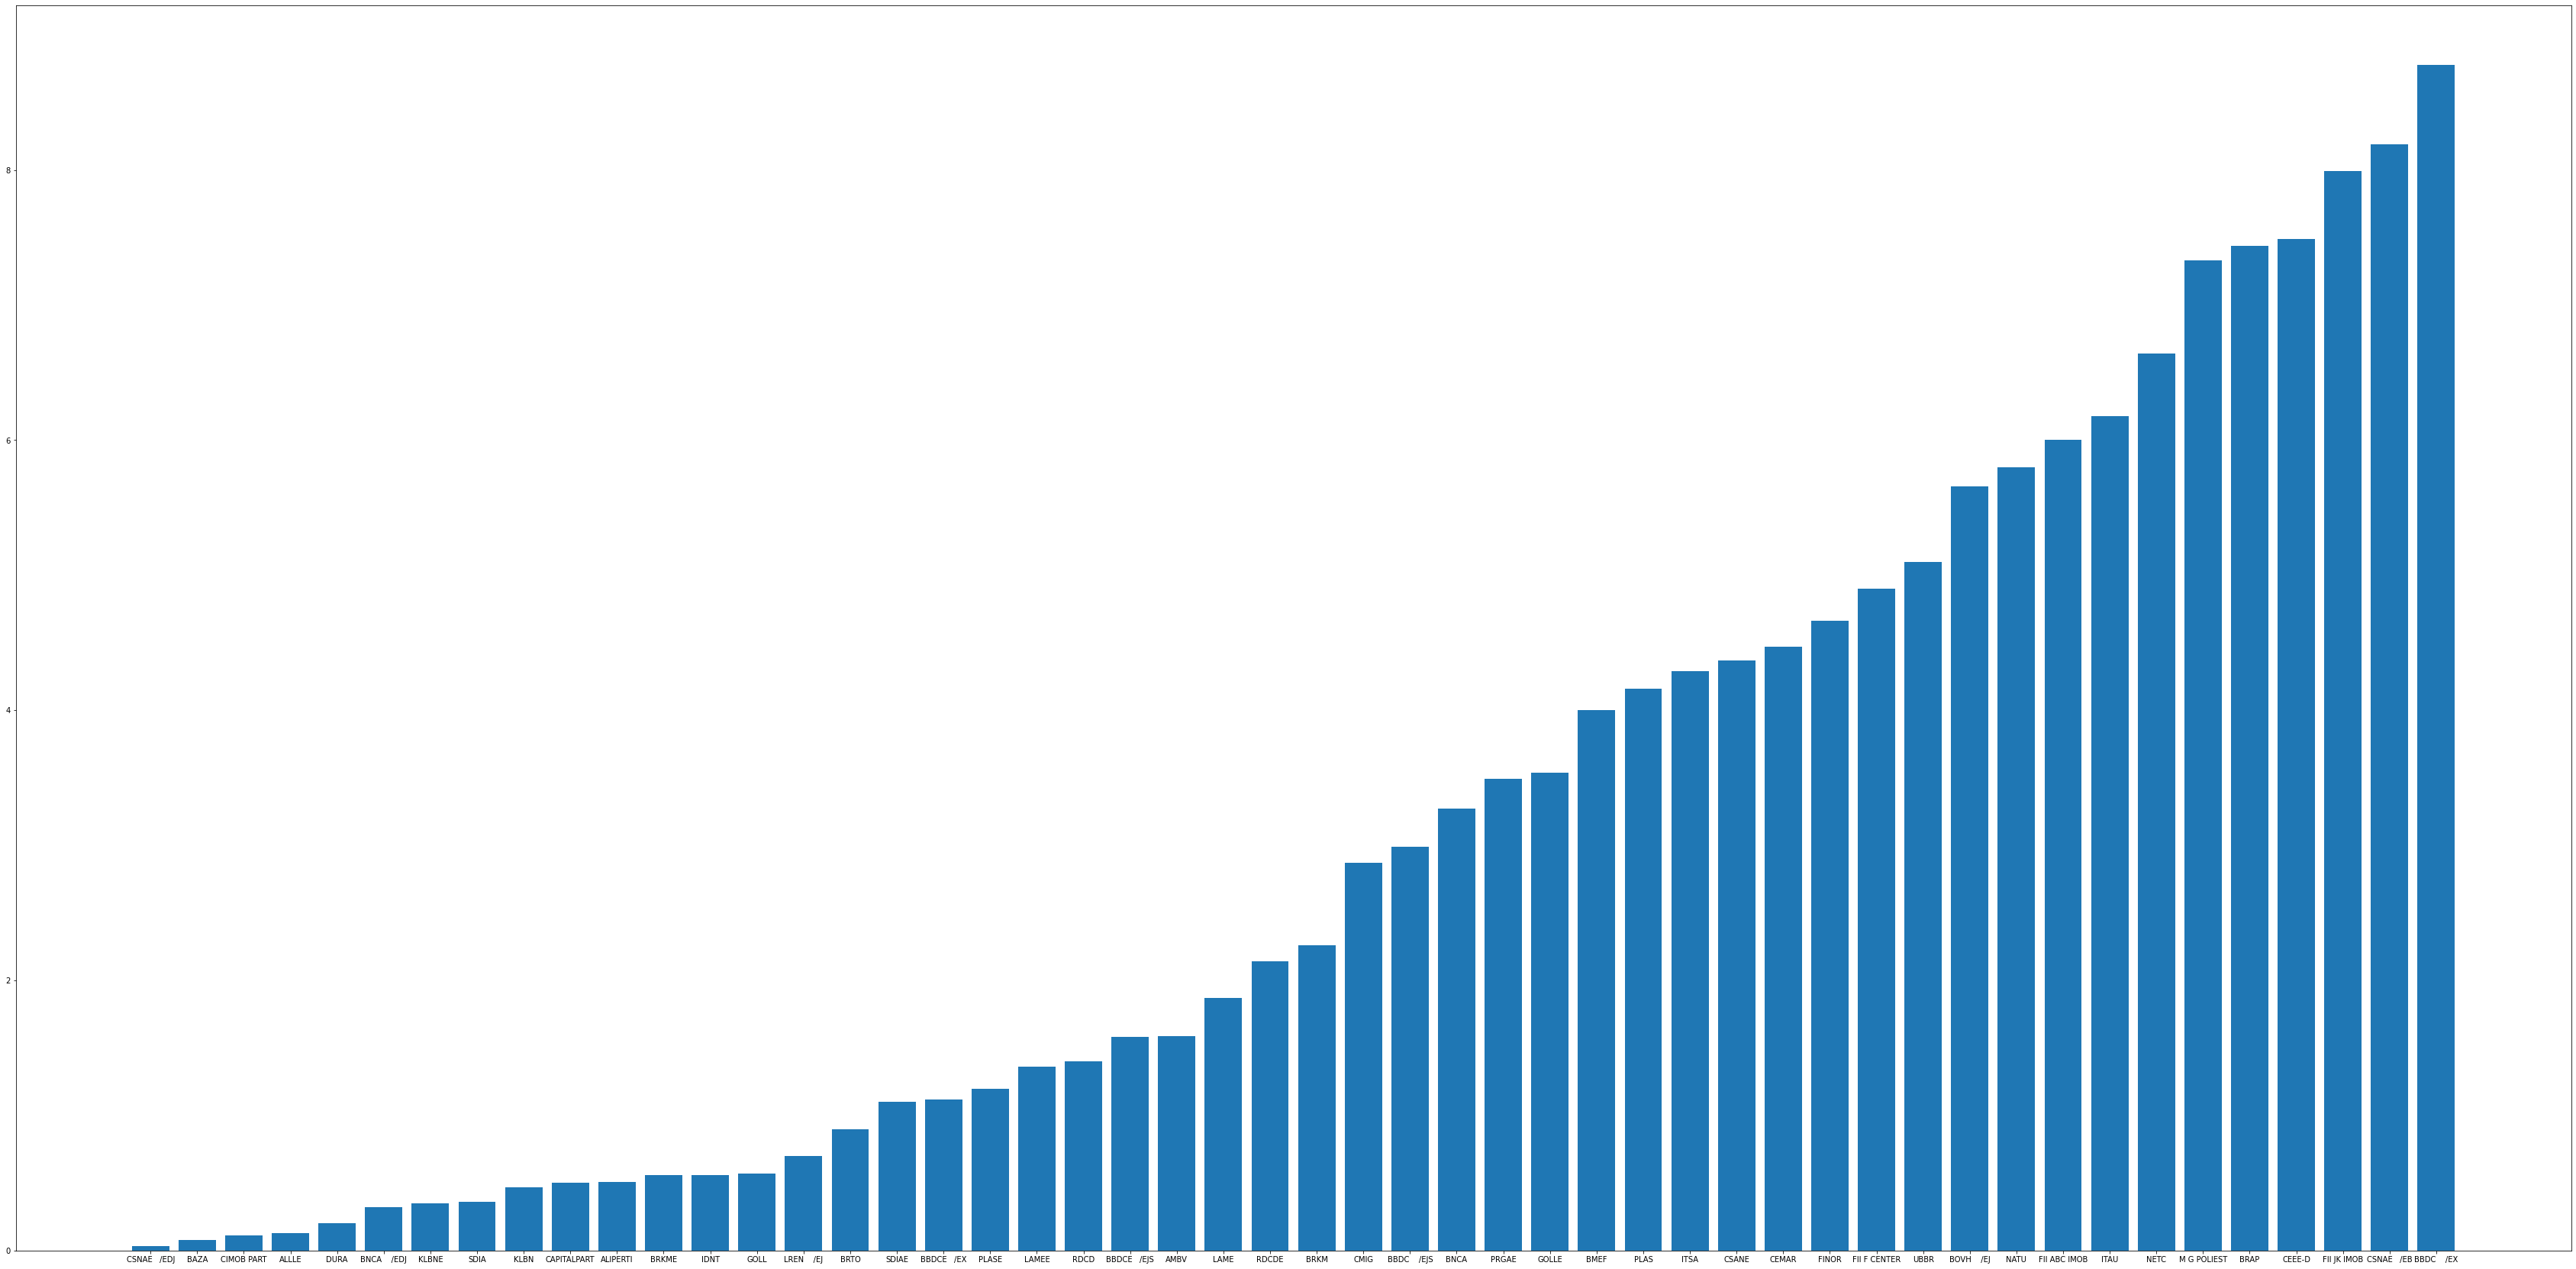

In [9]:
data_2008_lowest_abertura = data_2008.nsmallest(50, '1')

empresa = data_2008_lowest_abertura['Empresa']
janeiro = data_2008_lowest_abertura['1']

fig = plt.figure(figsize =(60, 30))
plt.bar(empresa, janeiro)
plt.show()

## Menores valores de abertura dos segmentos em 2008

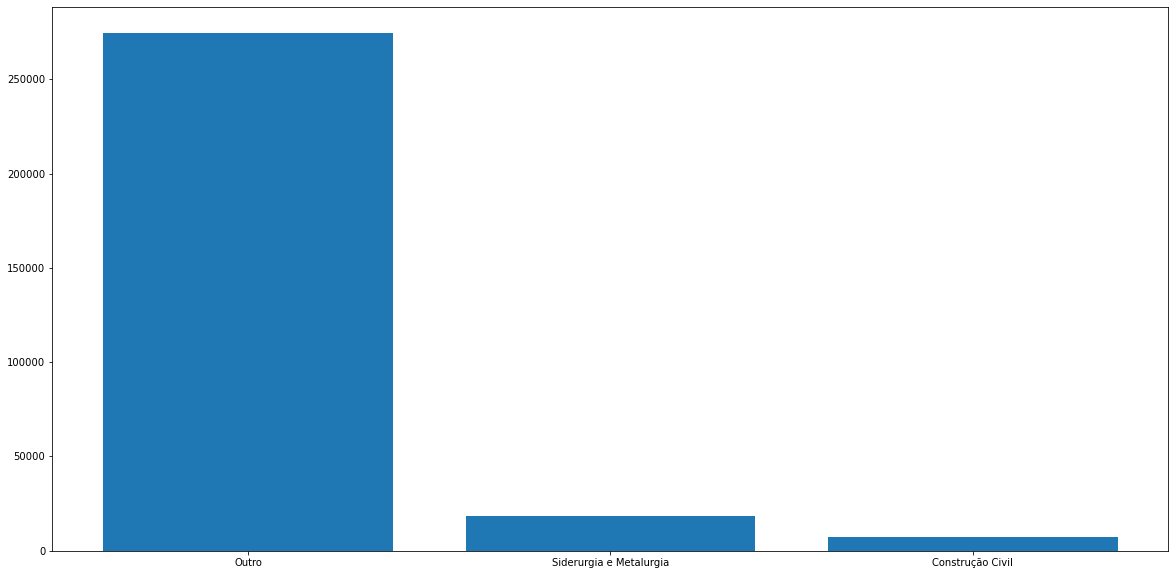

In [10]:
data_2008_largest_abertura = data_2008.nlargest(50, '1')

empresa = data_2008_largest_abertura['Segmento']
janeiro = data_2008_largest_abertura['1']

fig = plt.figure(figsize =(20, 10))
plt.bar(empresa, janeiro)
plt.show()

## Maiores valores de abertura dos segmentos em 2008

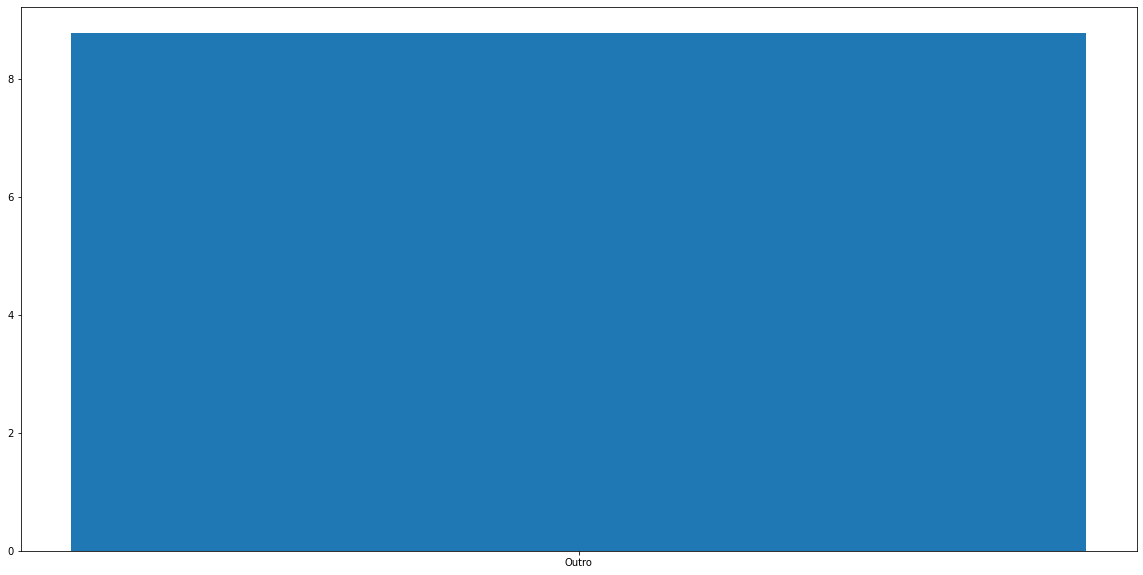

In [11]:
data_2008_lowest_abertura = data_2008.nsmallest(50, '1')

empresa = data_2008_lowest_abertura['Segmento']
janeiro = data_2008_lowest_abertura['1']

fig = plt.figure(figsize =(20, 10))
plt.bar(empresa, janeiro)
plt.show()

## Maiores valores de fechamento das empresas em 2008

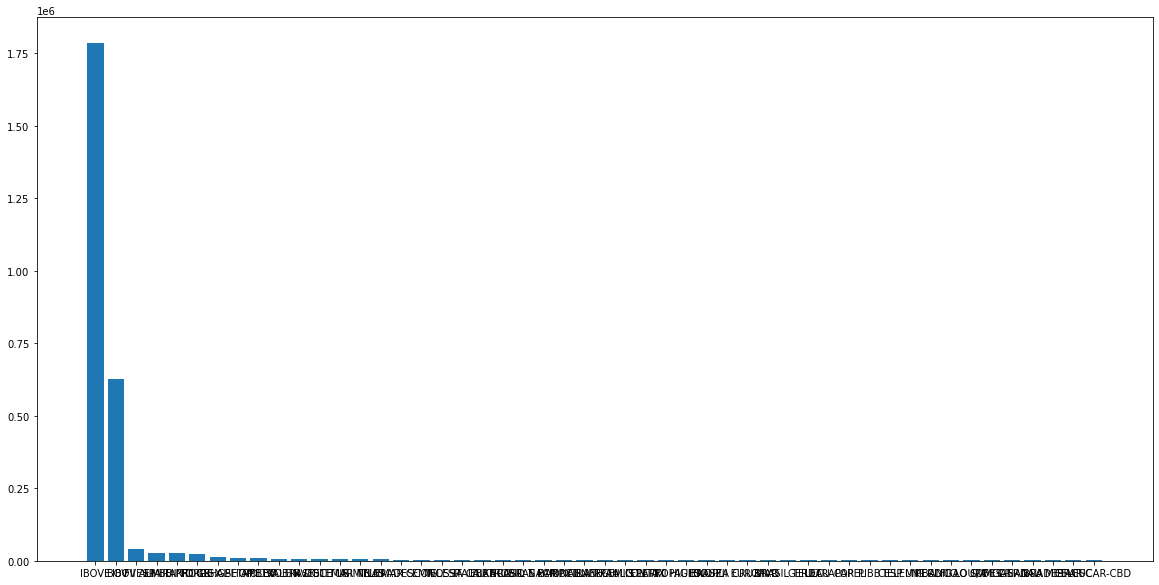

In [12]:
data_2008_largest_fechamento = data_2008.nlargest(50, '12')

empresa = data_2008_largest_fechamento['Empresa']
dezembro = data_2008_largest_fechamento['12']

fig = plt.figure(figsize =(20, 10))
plt.bar(empresa, dezembro)
plt.show()

## Maiores valores de fechamento dos segmentos em 2008

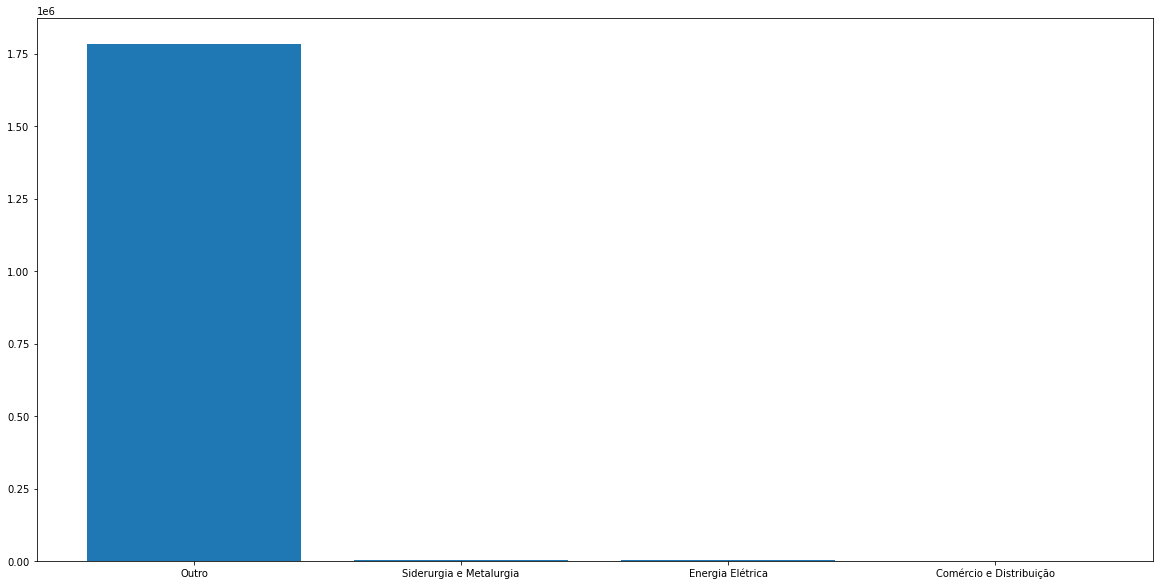

In [13]:
data_2008_largest_fechamento = data_2008.nlargest(50, '12')

empresa = data_2008_largest_fechamento['Segmento']
dezembro = data_2008_largest_fechamento['12']

fig = plt.figure(figsize =(20, 10))
plt.bar(empresa, dezembro)
plt.show()

## Menores valores de fechamento das empresas em 2008

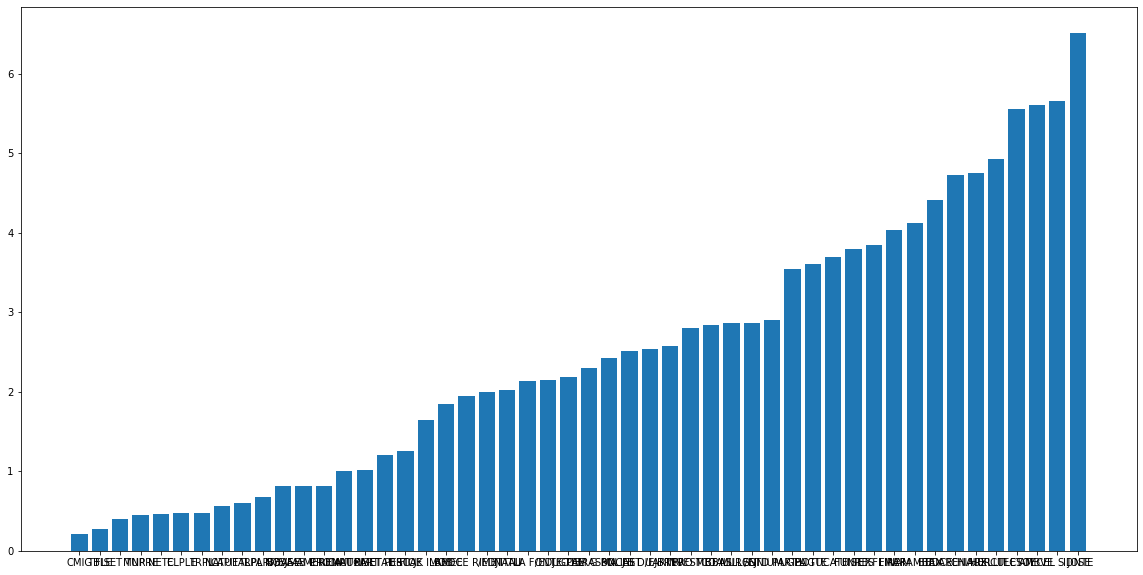

In [14]:
data_2008_lowest_fechamento = data_2008.nsmallest(50, '12')

empresa = data_2008_lowest_fechamento['Empresa']
dezembro = data_2008_lowest_fechamento['12']

fig = plt.figure(figsize =(20, 10))
plt.bar(empresa, dezembro)
plt.show()

## Menores valores de fechamento das empresas em 2008

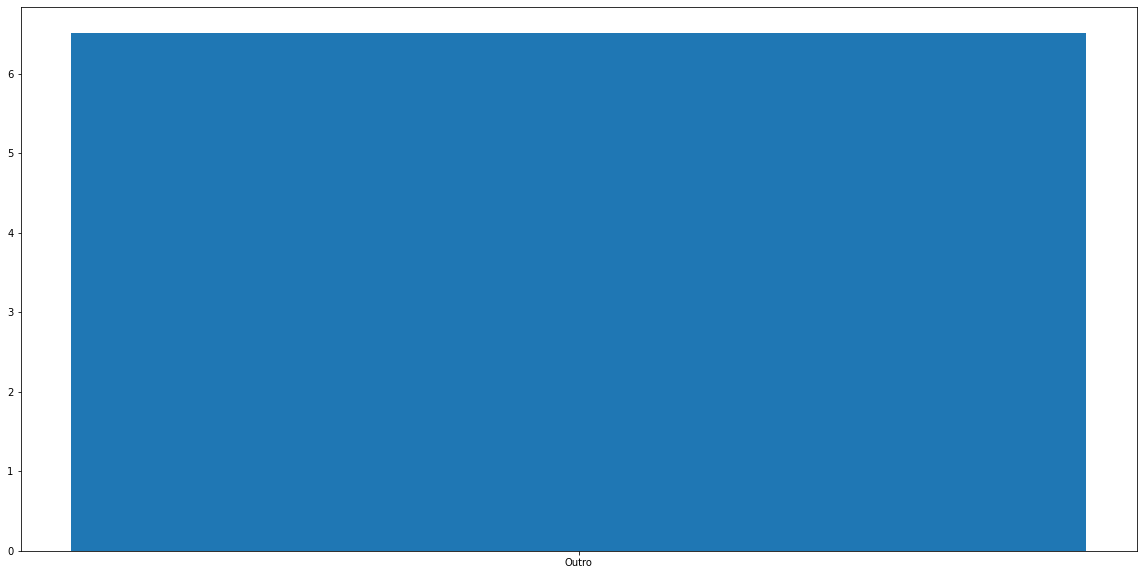

In [15]:
data_2008_lowest_fechamento = data_2008.nsmallest(50, '12')

empresa = data_2008_lowest_fechamento['Segmento']
dezembro = data_2008_lowest_fechamento['12']

fig = plt.figure(figsize =(20, 10))
plt.bar(empresa, dezembro)
plt.show()

## Calculando volatilidade e adicionando a coluna 

In [16]:
data_2008['Volatilidade'] = data_2008['1'] - data_2008['12'] 
data_2008.head()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade
0,Agropecuária,SLC AGRICOLA,805.76,857.33,986.26,1370.22,1506.47,1452.53,1512.72,1061.17,983.34,553.59,440.39,534.04,271.72
1,Alimentos Processados,M.DIASBRANCO,1166.72,784.78,738.87,1005.23,1020.48,945.18,1066.60,906.34,867.62,627.59,646.34,569.36,597.36
2,Alimentos Processados,SAO MARTINHO,1424.69,1346.24,1384.18,1373.47,1654.60,1340.56,1395.77,1151.49,1171.11,733.55,425.71,454.70,969.99
3,Automóveis e Motocicletas,IOCHP-MAXION,1979.15,1562.38,1788.05,1563.58,1902.57,1917.95,1570.17,1340.11,1293.30,813.15,483.66,437.47,1541.68
4,Automóveis e Motocicletas,PLASCAR PART,690.70,566.09,448.34,422.13,423.90,467.22,418.13,345.07,249.73,160.93,114.68,63.39,627.31



## Visualizando % de empresas que desvalorizaram

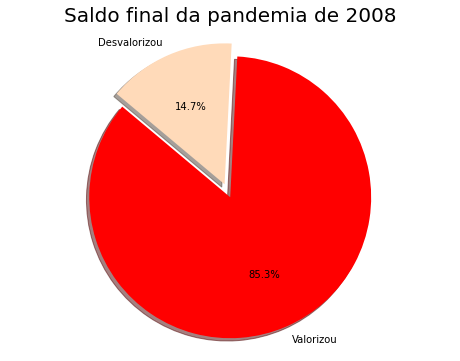

In [36]:
desvalorizaram = data_2008.index[data_2008['Volatilidade'] < 0]
valorizaram = data_2008.index[data_2008['Volatilidade'] > 0]

labels = 'Valorizou', 'Desvalorizou'
sizes = [valorizaram.size, desvalorizaram.size]
colors = ['red', 'peachpuff']
explode = (0.1, 0)  # explode 1st slice
fig = plt.figure(figsize=[8, 6])

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Saldo final da pandemia de 2008", fontsize=20)
plt.show()

## Analisando quem mais desvalorizou

In [37]:
data_2008_lowest = data_2008.nsmallest(20, 'Volatilidade')
data_2008_lowest.head()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade
349,Outro,IBOVE,236234.55,306908.03,285511.08,352072.65,132504.11,695488.50,417120.89,1440328.15,633436.97,2372775.89,321026.01,1785228.99,-1548994.44
348,Outro,IBOV,274439.53,1276556.45,431892.97,1355620.09,876272.92,1158023.64,314099.29,279791.42,325975.76,297974.10,234048.14,626351.82,-351912.29
280,Outro,FII CRIANCA,421.00,652.90,1125.02,922.00,673.10,460.00,1119.90,1095.00,878.00,1095.49,180.10,1980.23,-1559.23
658,Outro,VIVO,1100.35,1161.31,1067.42,1245.29,1223.06,1300.84,1199.45,975.78,979.20,1702.33,1855.38,2438.76,-1338.41
495,Outro,PETRE,733.00,1959.58,1061.92,1236.94,1234.88,1765.18,2276.01,2473.48,2423.74,3233.01,2251.46,1643.22,-910.22


<AxesSubplot:xlabel='Empresa'>

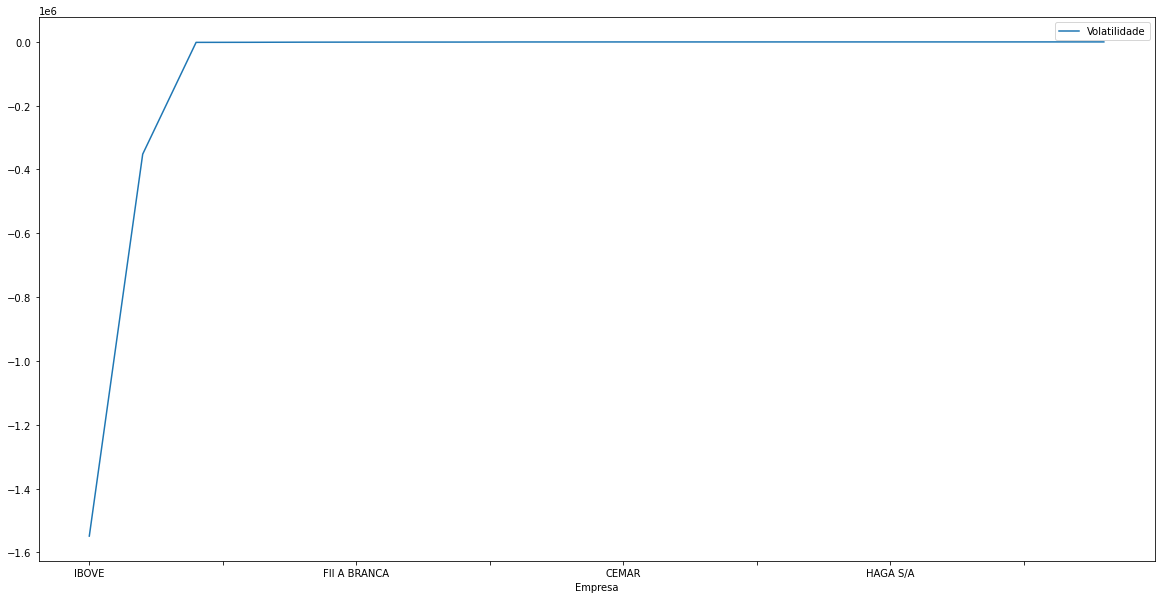

In [38]:
data_2008_lowest.plot(x='Empresa', y='Volatilidade', figsize=(20, 10)) 

## Analisando quem mais valorizou

In [39]:
data_2008_largest = data_2008.nlargest(20, 'Volatilidade')
data_2008_largest.head()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade
121,Outro,BR BROKERS,56419.10,31536.11,28024.51,30997.73,29699.73,43444.18,28403.84,5059.35,223.33,111.33,72.47,42.10,56377.00
453,Outro,MMX MINER,47262.47,39592.72,56793.19,21168.99,5045.71,4913.37,3817.09,1089.97,978.83,380.20,299.80,203.50,47058.97
440,Outro,MERC BRASIL,38696.35,726.51,630.98,886.97,689.41,778.47,646.49,449.32,503.93,344.78,397.96,332.78,38363.57
500,Outro,PETROBRAS,32641.17,26339.42,39639.91,32988.13,22847.75,26705.96,23493.56,16420.20,15075.21,12347.57,7819.69,7671.11,24970.06
644,Outro,USIMINAS,21154.90,18888.91,21699.17,26457.23,21629.20,22761.15,23305.12,28417.70,17212.82,8524.09,4970.23,5062.73,16092.17


<AxesSubplot:xlabel='Empresa'>

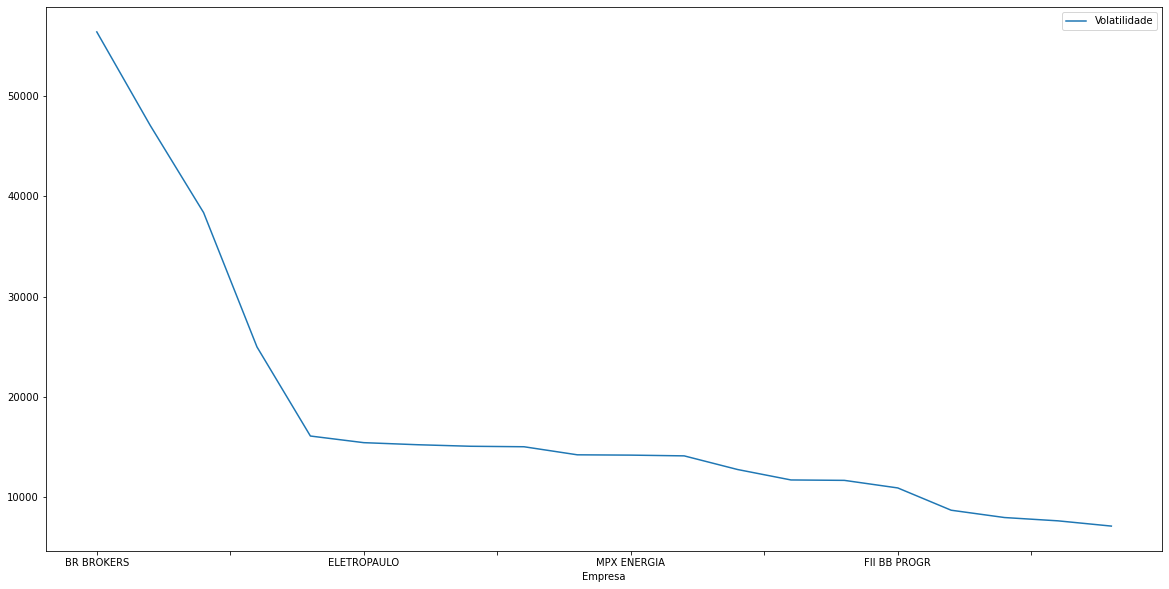

In [40]:
data_2008_largest.plot(x='Empresa', y='Volatilidade', figsize=(20, 10)) 

## Analisando segmentos que mais valorizaram

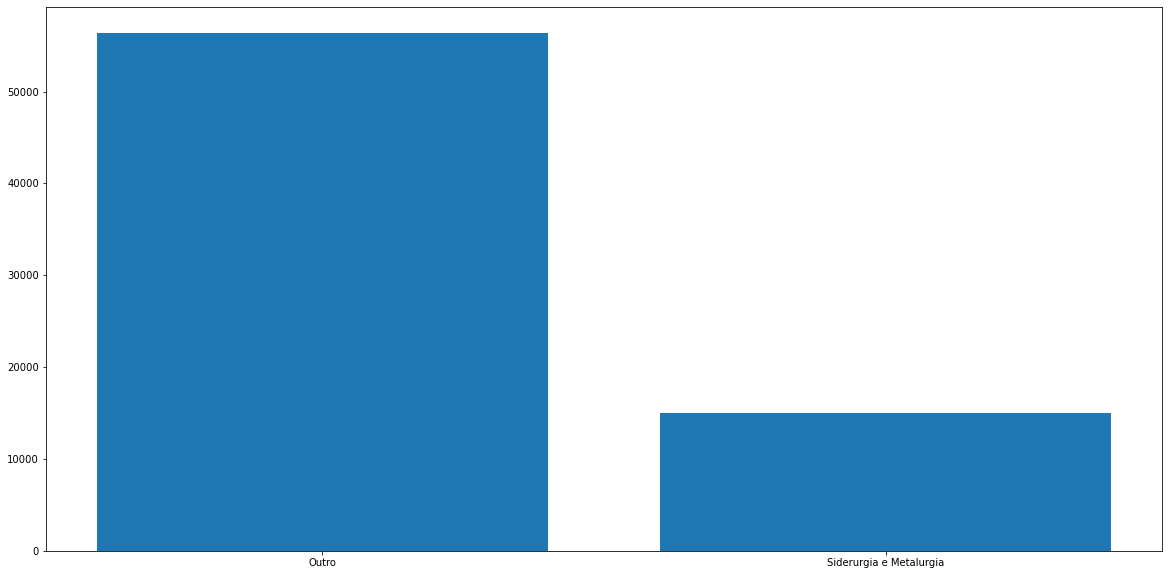

In [41]:
segmento = data_2008_largest['Segmento']
volatilidade = data_2008_largest['Volatilidade']

fig = plt.figure(figsize =(20, 10))
plt.bar(segmento[0:20], volatilidade[0:20])
plt.show()

## Analisando segmentos que mais desvalorizaram

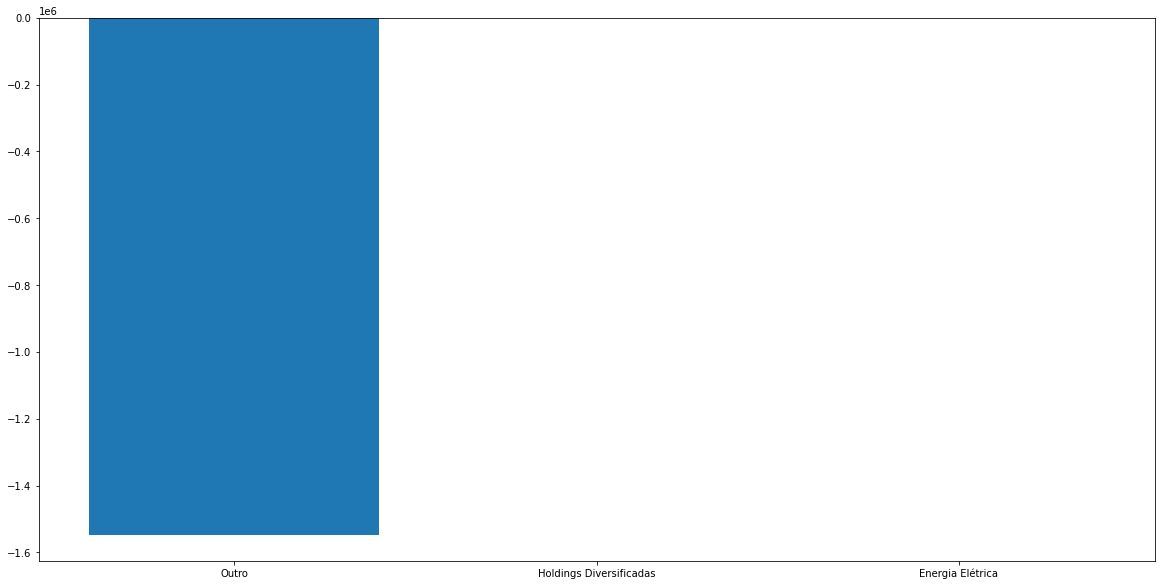

In [42]:
segmento = data_2008_lowest['Segmento']
volatilidade = data_2008_lowest['Volatilidade']

fig = plt.figure(figsize =(20, 10))
plt.bar(segmento[0:20], volatilidade[0:20])
plt.show()

## Correlação


In [126]:
data_2008_cor = data_2008.copy()
data_2008_cor['Segmento'] = data_2008_cor['Segmento'].astype('category').cat.codes
data_2008_cor['Segmento']

0       0
1       1
2       1
3       2
4       2
       ..
678    22
679    22
680    22
681    22
682    23
Name: Segmento, Length: 683, dtype: int8

In [127]:
data_2008_cor['Empresa'] = data_2008_cor['Empresa'].astype('category').cat.codes
data_2008_cor['Empresa']

0      575
1      421
2      558
3      352
4      510
      ... 
678    424
679    481
680    484
681    574
682    628
Name: Empresa, Length: 683, dtype: int16

In [144]:
correlations = data_2008_cor.corr()
data_2008_cor.corr()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade
Segmento,1.000000,-0.051536,0.014749,0.007962,0.011360,0.008346,0.008502,0.010812,0.012095,0.008207,0.010321,0.007125,0.010188,0.008377,-0.006157
Empresa,-0.051536,1.000000,-0.011575,-0.004082,-0.002855,-0.004115,-0.000315,-0.000580,0.002041,-0.002403,-0.006629,-0.005083,-0.008371,-0.002769,0.001931
1,0.014749,-0.011575,1.000000,0.859683,0.978214,0.865235,0.822688,0.949076,0.955106,0.752194,0.893303,0.705807,0.939039,0.824406,-0.740819
2,0.007962,-0.004082,0.859683,1.000000,0.931529,0.999570,0.995094,0.953277,0.767493,0.413318,0.650702,0.350105,0.758164,0.539520,-0.435717
3,0.011360,-0.002855,0.978214,0.931529,1.000000,0.935911,0.899694,0.987067,0.936724,0.690174,0.862248,0.638387,0.925340,0.781316,-0.694855
4,0.008346,-0.004115,0.865235,0.999570,0.935911,1.000000,0.993639,0.958903,0.778871,0.429997,0.664621,0.367325,0.769819,0.554981,-0.452697
5,0.008502,-0.000315,0.822688,0.995094,0.899694,0.993639,1.000000,0.923847,0.714082,0.333266,0.584417,0.267853,0.701153,0.464252,-0.355347
6,0.010812,-0.000580,0.949076,0.953277,0.987067,0.958903,0.923847,1.000000,0.921824,0.667756,0.848347,0.614969,0.916667,0.767068,-0.685084
7,0.012095,0.002041,0.955106,0.767493,0.936724,0.778871,0.714082,0.921824,1.000000,0.892153,0.980995,0.857401,0.993707,0.941657,-0.892597
8,0.008207,-0.002403,0.752194,0.413318,0.690174,0.429997,0.333266,0.667756,0.892153,1.000000,0.959107,0.997081,0.902328,0.988720,-0.994910


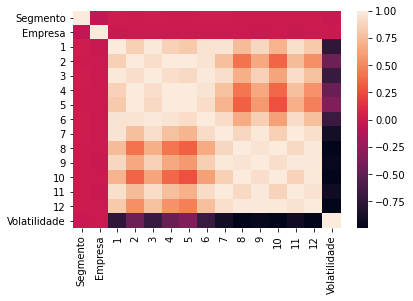

In [143]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlations)
plt.show()

# Pandemia 2020